# Loading Data

In [1]:
import pandas as pd

In [2]:
tweet = pd.read_csv('C:/WinPython_64bit/notebooks/Kapita Selekta/Scrapping Tweet/TweetClean.csv')
tweet.head()

,Unnamed: 0,Tweet,TweetClean_NonPT,TweetClean_PT
0,0,Udah ngeh blm min?\r\nItu sms 86mb jam 16.06 t...,sadar min sms 86 mb jam 16.06 tanggal 30.01 ke...,sadar min sms mb jam tanggal kemarin paketin t...
1,1,Dibaca itu yang kemarin min 86 mb... Pas jam 1...,dibaca kemarin min 86 mb .. jam 16.06 paketin ...,dibaca kemarin min mb jam paketin
2,2,@IndosatCare pusing saya min pake indosat... \...,pusing min pakai .. kuota kesedot,pusing min kuota
3,3,"Sudah min sudah, lagian apa yang mau di clear ...",min clear cache .. dibilang diuninstal diinsta...,min dibilang diuninstal diinstal sebulan min k...
4,4,"@IndosatCare masi juga lelet euy,, apakah bts ...",masi lelet euy bts bermasalah didaerah karna k...,masi didaerah karna kantor


In [3]:
listTweet=tweet['TweetClean_NonPT'].values.astype('U')
listTweet = [d for d in listTweet]

# MODEL VSM TF

In [4]:
#Pembentukan model svm TF untuk LDA
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

X = tf_vectorizer.fit_transform(listTweet)
X_terms = tf_vectorizer.get_feature_names()
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
X.shape

(4359, 7348)

In [5]:
import numpy as np
#menghapus tf yang bernilai 0
nidx = np.array(range(len(listTweet)))
nidx = nidx[X.getnnz(1)>0] # Remove Zero Rows
data_bersih = [listTweet[i] for i in nidx]
X = X[X.getnnz(1)>0] # Remove Zero Rows
X_terms = tf_vectorizer.get_feature_names()
print(X.shape)

(4359, 7348)


# Percobaan berbagai Model

## K-Means ++

In [6]:
from sklearn import cluster
from tqdm import tqdm

seed = 99 #harus ditetapkan untuk mengoptimalkan cost function 
#atau untuk konvergen lebih cepat aja dalam pengelompokannya, 
#tidak ada hubungan antara nilai pasti dari seed dan hasil pengelompokan KMeans
#seed ini harus ditentukan terlebih dahulu agar tidak menghasilkan pengelompokan yg berbeda setiap dijalankan aja
C=[]
K=[] 
kelompok = []
for k in tqdm(range(2,9)):
    kelompok.append(k)
    kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = seed)
    K.append(kmPP.fit(X))
    C.append(kmPP.predict(X))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:18<00:00, 45.46s/it]


In [7]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means/menggunakan centroid
from sklearn.metrics import silhouette_score as siluet

ScoreSiluet=[]
i=int(kelompok[0])
for res in C:
    ScoreSiluet.append(siluet(X,res))
    print("K={} ,nilai siluet {} ".format(i, siluet(X,res)))
    i=i+1
print("dengan score terbesar {}".format(max(ScoreSiluet)))    

K=2 ,nilai siluet 0.06108564474109709 
K=3 ,nilai siluet 0.05200411095948502 
K=4 ,nilai siluet 0.02065231373139576 
K=5 ,nilai siluet 0.026014451713444582 
K=6 ,nilai siluet -0.011427987820822407 
K=7 ,nilai siluet 0.004055678798949313 
K=8 ,nilai siluet 0.006824328141372005 
dengan score terbesar 0.06108564474109709


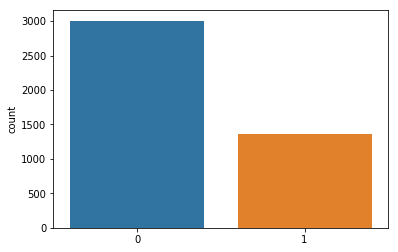

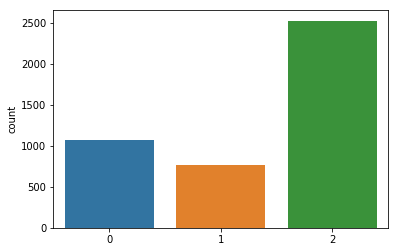

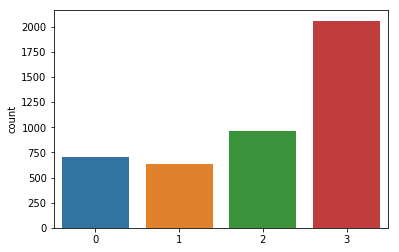

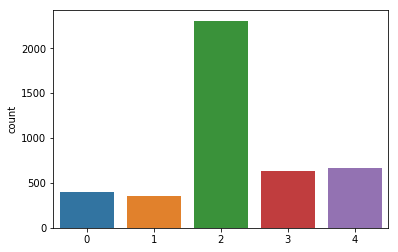

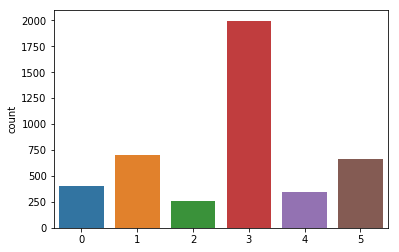

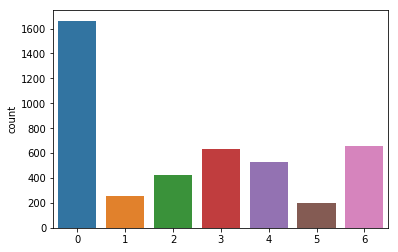

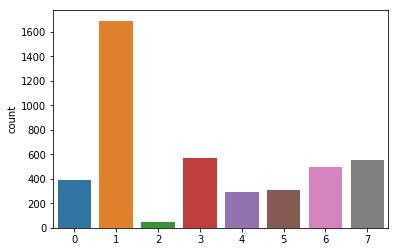

In [26]:
#dengan 9 Kluster yang menurut Evaluasi secara internal terbaik 
import seaborn as sns
import matplotlib.pyplot as plt

for i in C:
    sns.countplot(i)
    plt.show()

## Mini Batch K-Means++

In [9]:
from sklearn import cluster
from tqdm import tqdm

# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk

seed = 99 #harus ditetapkan untuk mengoptimalkan cost function 
#atau untuk konvergen lebih cepat aja dalam pengelompokannya, 
#tidak ada hubungan antara nilai pasti dari seed dan hasil pengelompokan KMeans
#seed ini harus ditentukan terlebih dahulu agar tidak menghasilkan pengelompokan yg berbeda setiap dijalankan aja
Cmb=[]
Kmb=[] 
kelompokMb = []
for k in tqdm(range(2,9)):
    kelompokMb.append(k)
    MiniBatchKM = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300,batch_size=10 , tol=0.0001, random_state = seed) 
    Kmb.append(MiniBatchKM.fit(X))
    Cmb.append(MiniBatchKM.predict(X))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.75it/s]


In [10]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means/menggunakan centroid
from sklearn.metrics import silhouette_score as siluet

ScoreSiluet=[]
i=int(kelompok[0])
for res in Cmb:
    ScoreSiluet.append(siluet(X,res))
    print("K={} ,nilai siluet {} ".format(i, siluet(X,res)))
    i=i+1
print("dengan score terbesar {}".format(max(ScoreSiluet)))   

K=2 ,nilai siluet 0.0892613943640298 
K=3 ,nilai siluet 0.07171874143766606 
K=4 ,nilai siluet 0.053488002184451836 
K=5 ,nilai siluet -0.15878074003496181 
K=6 ,nilai siluet 0.05570346506754456 
K=7 ,nilai siluet -0.07793429881722708 
K=8 ,nilai siluet 0.08310677594311161 
dengan score terbesar 0.0892613943640298


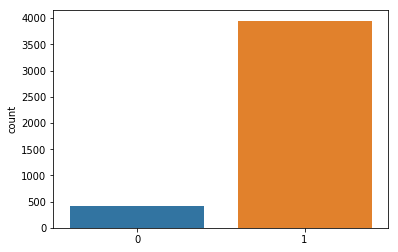

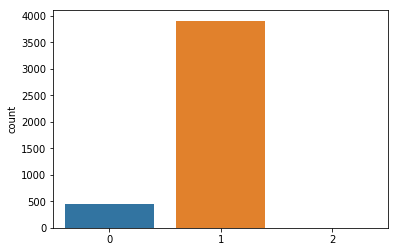

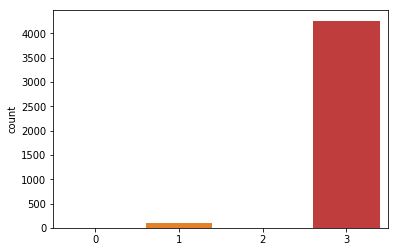

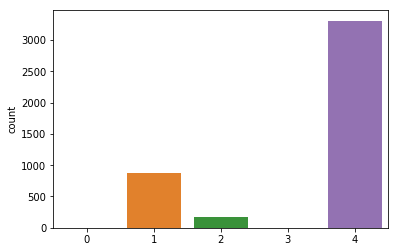

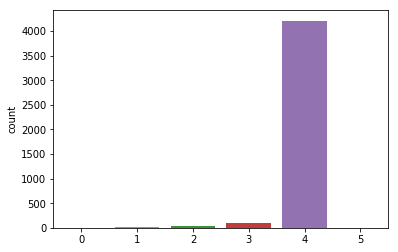

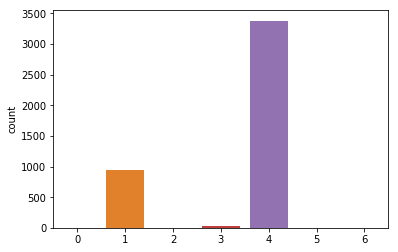

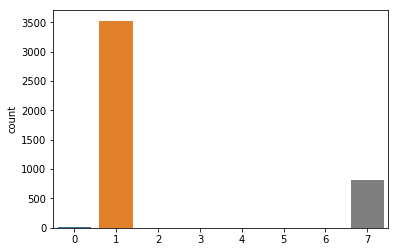

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in Cmb:
    sns.countplot(i)
    plt.show()

## DBSCAN Clustering

In [12]:
from sklearn import cluster

DBScan = cluster.DBSCAN(eps=1)
DBScan.fit(X)
C_DB = DBScan.labels_.astype(np.int)

In [13]:
siluet(X,C_DB)

-0.29152693213614805

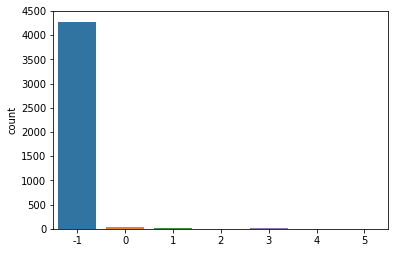

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(C_DB)
plt.show()

## LDA Clustering

In [15]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda=[]
for n_topics in tqdm(range(2,9)):
    model=LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(X)
    lda.append(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:32<00:00, 38.97s/it]


In [16]:
vsm_topics=[]
for i in tqdm(lda):
    vsm_topics.append(i.transform(X))
    #ini matriks topik terhadap masing-masing kata 

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:11<00:00,  1.60s/it]


In [17]:
doc_topic=[]
for i in tqdm(range(len(vsm_topics))):
    doc_topic.append([a.argmax()+1 for a in vsm_topics[i]]) # topic of docs

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 143.83it/s]


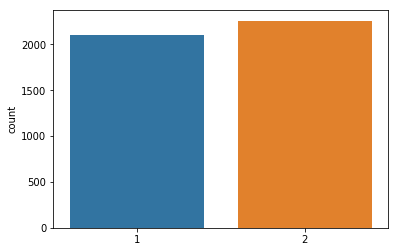

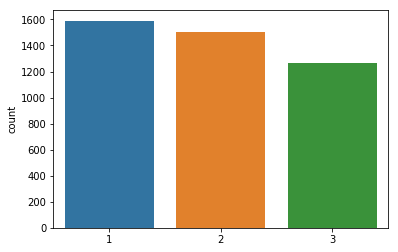

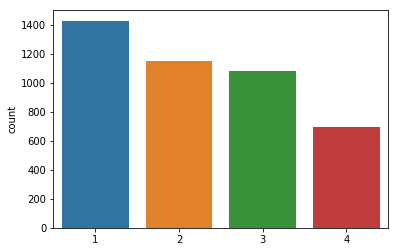

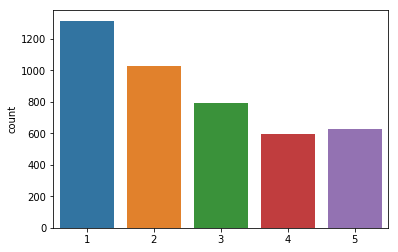

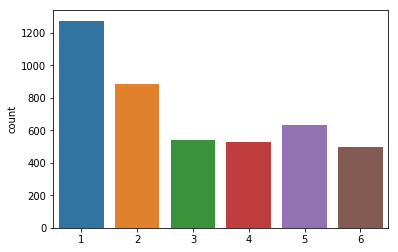

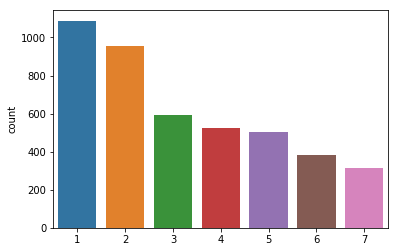

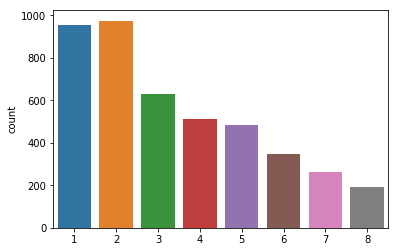

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in doc_topic:
    sns.countplot(i)
    plt.show() 

In [19]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [28]:
# Mari kita coba maknai masing-masing topic ini
Top_Words=15 #ini mau memunculkan berapa banyak kata, untuk memudahkan pendefinisian kelompok
Ntopic=3
print('Printing top {0} Topics, with top {1} Words:'.format(Ntopic, Top_Words))
print_Topics(lda[Ntopic-2], X_terms,Ntopic, Top_Words)

Printing top 3 Topics, with top 15 Words:
Topic #1:
paket min ya kuota pulsa internet pakai data gb yellow kak beli sms kah habis
Topic #2:
pulsa dm sms tolong langgan ya cek min isi kali potong mohon nya respon kepotong
Topic #3:
jaring sinyal banget lemot nya min ya internet pakai tolong kali kah nih cepat dm


In [21]:
Ntopic=3
Vectorized = tf_vectorizer
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda[Ntopic-2], X, Vectorized)  

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      38.247425        1       1 -0.095583  0.103252
1      34.075475        1       2 -0.080263 -0.109428
2      27.677100        1       3  0.175847  0.006176, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
5633  Default  1650.000000        pulsa  1650.000000  30.0000  30.0000
5201  Default   990.000000        paket   990.000000  29.0000  29.0000
6297  Default   363.000000       sinyal   363.000000  28.0000  28.0000
3271  Default   407.000000       jaring   407.000000  27.0000  27.0000
4093  Default   207.000000        lemot   207.000000  26.0000  26.0000
1041  Default   304.000000       banget   304.000000  25.0000  25.0000
2311  Default   456.000000           dm   456.000000  24.0000  24.0000
2658  Default   236.000000           gb   236.000000  23.0000  23.0000
3411  Default   225.000000          kak   225.000000  22.0000  22.0000
1756  Default   295.000000         data   295.000000  21.0000  21.0000
7083  Default   150.000000    unlimited   150.000000  20.0000  20.0000
7307  Default   249.000000       yellow   249.000000  19.0000  19.0000
1157  Default   250.000000         beli   250.000000  18.0000  18.0000
6372  Default   492.000000          sms   492.000000  17.0000  17.0000
1710  Default    81.000000       daerah    81.000000  16.0000  16.0000
3011  Default   104.000000           id   104.000000  15.0000  15.0000
1543  Default    84.000000        cepat    84.000000  14.0000  14.0000
1715  Default   263.000000       daftar   263.000000  13.0000  13.0000
3317  Default    79.000000        jelek    79.000000  12.0000  12.0000
5543  Default   170.000000       potong   170.000000  11.0000  11.0000
6303  Default    77.000000    sinyalnya    77.000000  10.0000  10.0000
3185  Default   213.000000          isi   213.000000   9.0000   9.0000
4668  Default    95.000000        myim3    95.000000   8.0000   8.0000
5721  Default   272.000000           rb   272.000000   7.0000   7.0000
2794  Default   294.000000        habis   294.000000   6.0000   6.0000
5244  Default    78.000000        parah    78.000000   5.0000   5.0000
7316  Default    87.000000         ylki    87.000000   4.0000   4.0000
5803  Default   146.000000       respon   146.000000   3.0000   3.0000
2554  Default   103.000000      freedom   103.000000   2.0000   2.0000
3866  Default    78.000000      koneksi    78.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
4652   Topic3    16.709882        murah    17.339652   1.2476  -6.7858
4187   Topic3    15.872298          lte    16.472780   1.2474  -6.8372
3271   Topic3   385.701626       jaring   407.726373   1.2290  -3.6467
5244   Topic3    73.917422        parah    78.921031   1.2191  -5.2989
6442   Topic3    32.062833       stabil    33.828506   1.2310  -6.1341
3866   Topic3    71.537573      koneksi    78.130573   1.1964  -5.3316
7001   Topic3    35.829050        turun    38.174298   1.2212  -6.0230
1041   Topic3   242.299719       banget   304.273674   1.0568  -4.1116
3164   Topic3    45.699250  internetnya    53.021978   1.1359  -5.7797
2560   Topic3    37.996564         full    43.420299   1.1511  -5.9643
5449   Topic3    43.075701       pindah    51.307704   1.1097  -5.8388
2620   Topic3    81.446517       ganggu   117.847629   0.9151  -5.2019
5008   Topic3   190.021476          nya   394.568770   0.5539  -4.3547
4525   Topic3    43.601244       minggu    52.996654   1.0894  -5.8267
5601   Topic3    61.031815     provider    88.799124   0.9096  -5.4904
4908   Topic3   104.459016          nih   217.823967   0.5497  -4.9530
3158   Topic3   160.056535     internet   466.180581   0.2155  -4.5263
3428   Topic3   137.030604         kali   372.599796   0.2843  -4.6816
5194   Topic3   141.769539        pakai   485.699287   0.0532  -4.

## NMF Clustering

In [22]:
from sklearn.decomposition import NMF

nmf=[]
for n_topics in tqdm(range(2,9)):
    model=NMF(n_components=n_topics, random_state=0).fit(X)
    nmf.append(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.96it/s]


In [23]:
vsm_topics_nmf=[]
for i in tqdm(nmf):
    vsm_topics_nmf.append(i.transform(X))
    #ini matriks topik terhadap masing-masing kata 

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 134.09it/s]


In [24]:
doc_topic_nmf=[]
for i in tqdm(range(len(vsm_topics_nmf))):
    doc_topic_nmf.append([a.argmax()+1 for a in vsm_topics_nmf[i]]) # topic of docs

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 127.40it/s]


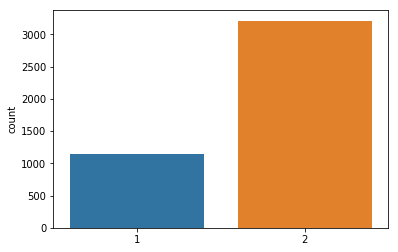

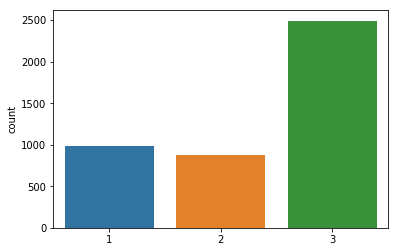

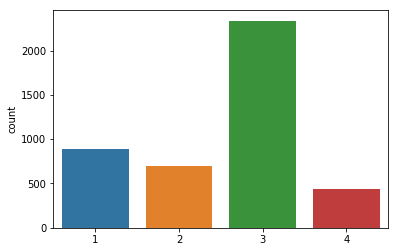

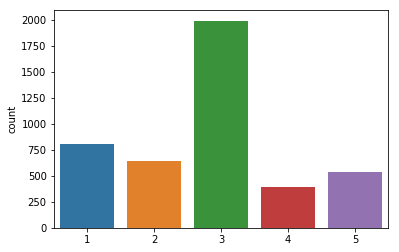

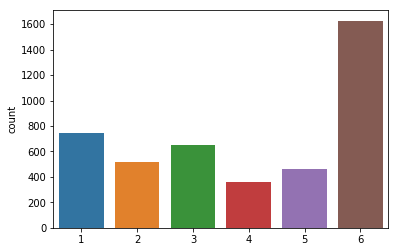

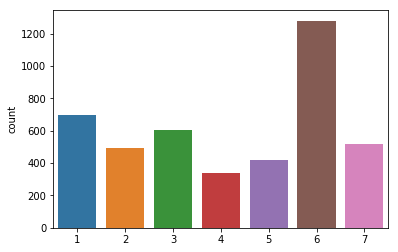

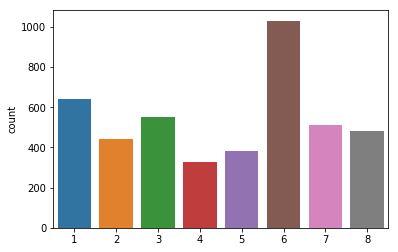

In [25]:
# mari kita plot
import matplotlib.pyplot as plt
import seaborn as sns
for i in doc_topic_nmf:
    sns.countplot(i)
    plt.show() 